In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix


df = pd.read_csv('predicts_cancelled_og_weather.csv')



In [2]:
columns_to_dummy = ["month", "day_of_week", "airline_code", "common_airline_code","origin","dest","origin_takeoff_weather Type", "dep_time_blk", "arr_time_blk"]

In [3]:
df = pd.get_dummies(df, columns=columns_to_dummy)

In [10]:
# pd.set_option('display.max_columns', None)
# df

day_of_month  cancelled  scheduled_elapsed_time  distance  \
0                14          0                     183      1208   
1                14          0                     173      1208   
2                10          0                     179      1208   
3                11          0                     177      1208   
4                11          0                     178      1208   
...             ...        ...                     ...       ...   
20221            23          0                     113       590   
20222            23          0                     117       590   
20223            27          0                     116       590   
20224            30          0                     118       590   
20225            30          0                     116       590   

       origin_takeoff_weather Severity  origin_takeoff_weather_Precipitation  \
0                                    2                                  0.00   
1                                    2                                  0.00   
2                                    4                                  0.00   
3                                    1                                  0.03   
4                                    2                                  0.10   
...                                ...                                   ...   
20221                                2                                  1.50   
20222                                1                                  0.49   
20223                                1                                  0.00   
20224                                2                                  0.36   
20225                                2                                  0.11   

       dest_takeoff_weather Severity  dest_takeoff_weather_Precipitation  \
0                                  1                                0.17   
1                                  1                                0.17   
2                                  2                                0.07   
3                                  1                                0.00   
4                                  2                                0.00   
...                              ...                                 ...   
20221                              1                                0.23   
20222                              1                                0.23   
20223                              2                                0.07   
20224                              1                                0.00   
20225                              1                                0.04   

       origin_weather_length_preflight  dest_weather_length_preflight  \
0                                   37                            158   
1                                   22                            323   
2                                  232                              8   
3                                   82                             38   
4                                   22                             23   
...                                ...                            ...   
20221                              115                            133   
20222                              536                             14   
20223                               14                             13   
20224                               45                             15   
20225                               14                             13   

       month_1  month_2  month_3  month_4  month_5  month_6  month_7  month_8  \
0            0        0        0        1        0        0        0        0   
1            0        0        0        1        0        0        0        0   
2            0        1        0        0        0        0        0        0   
3            0        1        0        0        0        0        0        0   
4            0        1        0  

In [4]:
X = df.drop('cancelled',axis=1)
y = df['cancelled']

seed= 50
# split into train and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.15, random_state=seed
)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

rf = RandomForestClassifier()
rf.fit(X_train_s, y_train)

y_pred = rf.predict(X_test_s)

cm = confusion_matrix(y_test, y_pred)

features = pd.DataFrame({'feature':list(X.columns),'importance':rf.feature_importances_}).sort_values('importance',ascending=False)



top_features = features.head(10)

top_features

feature  importance
5         origin_weather_length_preflight    0.095907
0                            day_of_month    0.080529
1                  scheduled_elapsed_time    0.080208
2                                distance    0.063232
4    origin_takeoff_weather_Precipitation    0.060680
3         origin_takeoff_weather Severity    0.023287
174      origin_takeoff_weather Type_Snow    0.020062
7                                 month_2    0.018472
24                          day_of_week_7    0.016315
8                                 month_3    0.013648

In [5]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# df.isin(['ORD']).any()
# df.dtypes
# X[~X.applymap(np.isreal).all(1)]
# accuracy_score(y_test, y_pred)

0.9694846200855571

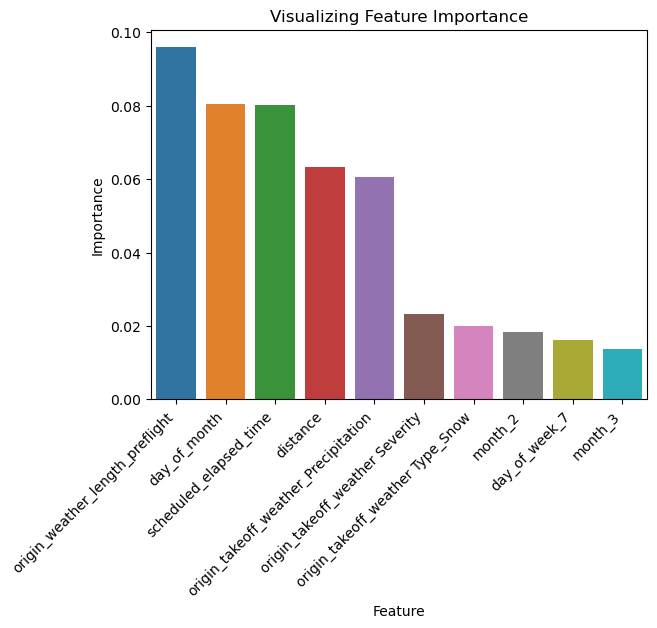

In [6]:
ax = sns.barplot(x = top_features.feature, y = top_features.importance)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Visualizing Feature Importance')
plt.xticks(rotation = 45,ha = 'right')
plt.show()

In [7]:
df = pd.DataFrame(cm, index=np.unique(y_test), columns=np.unique(y_pred))
df.index.name = 'Actual label'
df.columns.name = 'Predicted label'
df

Predicted label      0    1
Actual label               
0                23524   52
1                  697  272

In [8]:
accuracy_score(y_test, y_pred)

0.9694846200855571

In [11]:
# from xgboost import XGBRegressor
# from sklearn.metrics import r2_score
# gb = XGBRegressor()
# gb.fit(X, y)
# y_hat = gb.predict(X)
# r2_score(y,y_hat)


0.47963153647306855

In [10]:
from xgboost import XGBClassifier
from sklearn.metrics import r2_score, accuracy_score
gb = XGBClassifier()
gb.fit(X, y)
y_hat = gb.predict(X)
accuracy_score(y,y_hat)

0.9747726606042828

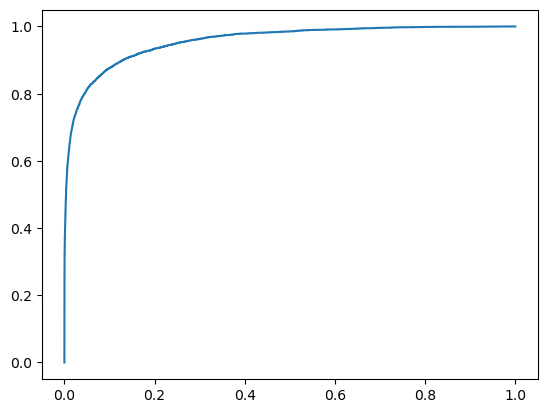

In [12]:
from sklearn.metrics import roc_curve 
curve = roc_curve(y, gb.predict(X))
plt.plot(curve[0], curve[1], label='ROC');


In [13]:
from xgboost import XGBClassifier
from sklearn.metrics import auc, accuracy_score
gb = XGBClassifier()
gb.fit(X, y)
y_hat = gb.predict(X)
auc(curve[0],curve[1])

0.9567146811766398